In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout

Using TensorFlow backend.


In [2]:
#read data
suicide_df = pd.read_csv('master.csv')

In [3]:
suicide_df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [4]:
countryyears = suicide_df['country-year'].unique()
age = suicide_df.age.unique()
years = suicide_df.year.unique()
countries = suicide_df.country.unique()

In [5]:
# pivot_table for age distribution of number of suicides
df1 = pd.pivot_table(suicide_df[suicide_df['country-year']=='Latvia2000'], values='suicides_no', index='age',columns='year', aggfunc='sum')
df1

year,2000
age,
15-24 years,61
25-34 years,98
35-54 years,304
5-14 years,6
55-74 years,233
75+ years,68


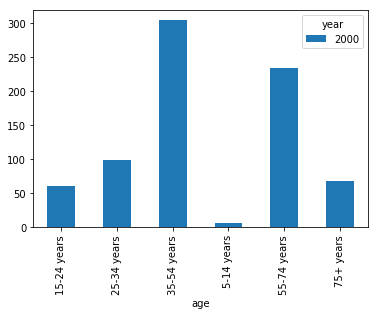

In [6]:
df1.plot(kind='bar')

the age group of maximum suicide rate varies from country to country.

In [7]:
#to get suicide rate relative to gdp
def suicide_rate(country):
    gdp_and_suicide_rate= pd.DataFrame(columns=['Year','No_of_suicides/100k_pop','gdp_per_capita'])
    i=0
    for year in years:
        filtered_2 = suicide_df[(suicide_df['country'] == country) & (suicide_df['year'] == year)]
        suicide_rate = filtered_2.sum(axis=0)
#         print(year, suicide_rate['suicides/100k pop'],suicide_rate['gdp_per_capita ($)']/12)
        gdp_and_suicide_rate.loc[i]=[year, suicide_rate['suicides/100k pop'],suicide_rate['gdp_per_capita ($)']/12]
        i+=1
#         gdp_and_suicide_rate.append({'Year':year,'No_of_suicides/100k_pop':suicide_rate['suicides/100k pop'], 'gdp_per_capita' :suicide_rate['gdp_per_capita ($)']/12}, ignore_index=True) 
    return(gdp_and_suicide_rate)
    print(gdp_and_suicide_rate)
#         print(year, suicide_rate['suicides/100k pop'],suicide_rate['gdp_per_capita ($)']/12)countryes=['Latvia','Belarus','Spain']


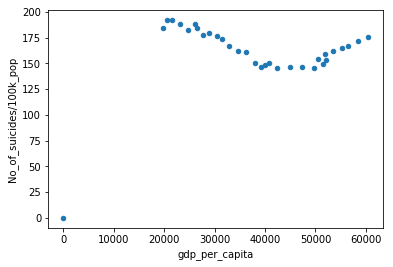

In [9]:
df= suicide_rate('United States')
df.plot(x= 'gdp_per_capita', y='No_of_suicides/100k_pop', kind='scatter')

there is a correlation between gdp and suicide rate but varies from country to country.